In [34]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [36]:
SE_size_factor = 0.02
lam_factor = 3
area_factor = 0.001
connectivity = 8

area_factor_large = 0.001
area_factor_very_large = 0.01
weight_all = 0.33
weight_large = 0.33
weight_very_large = 0.33
offset = 80
stepsize = 1

lam=27

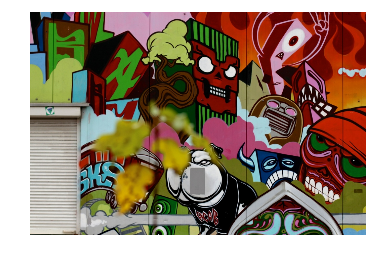

In [37]:
#Load the image
path_to_image = '../tests/images/Color/color.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [38]:
binarizer = sr.DatadrivenBinarizer( lam=lam,
                 area_factor_large=area_factor_large,
                 area_factor_verylarge=area_factor_very_large,
                 weights=(weight_all, weight_large, weight_very_large),
                 offset=offset,
                 stepsize=stepsize,
                 connectivity=connectivity)

#for now: use simple threshold binarizer
binarizer = sr.ThresholdBinarizer(125)

In [39]:
#our detection object
det = sr.SalientDetector(binarizer=binarizer, 
                         SE_size_factor=SE_size_factor, 
                         area_factor=area_factor,
                         lam_factor=lam_factor, 
                         connectivity=connectivity)


In [40]:
area = img.shape[0] * img.shape[1]
SE2, lam2 = det.get_SE(area)
print(area)
print(lam2, SE2.shape)
print(lam_factor*np.floor(SE_size_factor*np.sqrt(area/np.pi)))

667000
27 (17, 17)
27.0


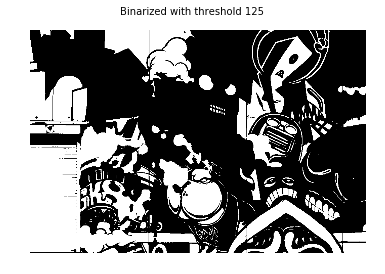

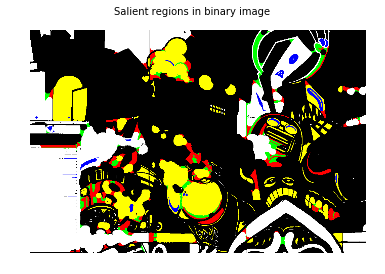

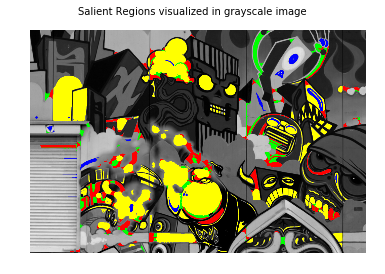

27 (17, 17)


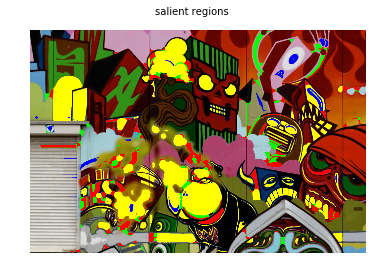

In [41]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=True)
#assert det.lam == lam
print(det.lam, det.SE.shape) #, lam
sr.visualize_elements(img, regions=regions);

{'islands': 152, 'protrusions': 102, 'holes': 25, 'indentations': 71}


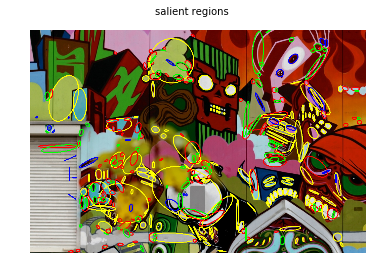

In [42]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'islands': 151, 'protrusions': 105, 'holes': 23, 'indentations': 81}


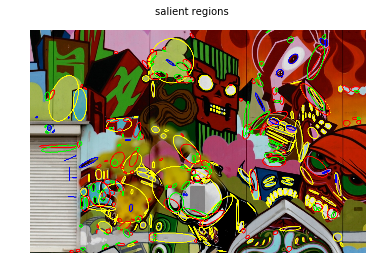

In [43]:
matfile = sio.loadmat('../tests/features/Color/color_dmsrallregions.mat')
masks = matfile['saliency_masks'] * 255
holes_true = masks[:,:, 0]
islands_true = masks[:,:, 1]
indents_true = masks[:,:, 2]
prots_true =  masks[:,:, 3]
regions_dmsr = {"holes": holes_true, "islands": islands_true, "indentations":indents_true, "protrusions": prots_true}

#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsr, features_standard_dmsr, features_poly_dmsr = sr.binary_mask2ellipse_features(regions_dmsr, 
                                                                                connectivity=connectivity)
print(num_regions_dmsr)
sr.visualize_elements_ellipses(img, features_standard_dmsr);

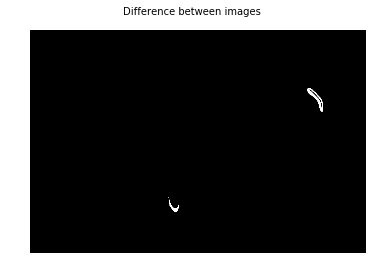

holes equal:  False


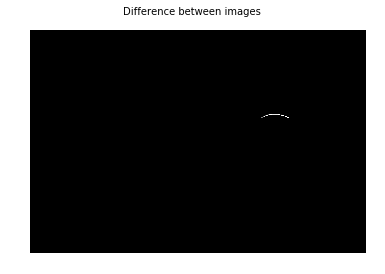

islands equal:  False


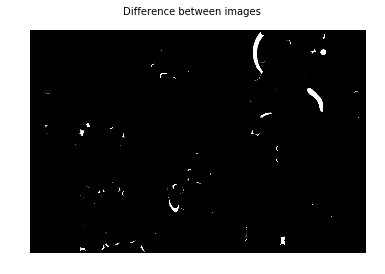

indentations equal:  False


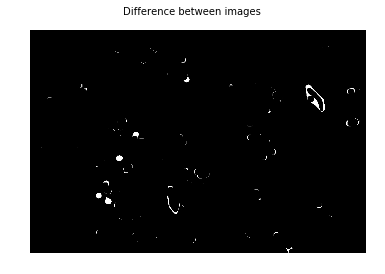

protrusions equal:  False


In [44]:
for r in ['holes', 'islands', 'indentations', 'protrusions'] :
    print(r+' equal: ', sr.image_diff(regions[r], regions_dmsr[r]))